# Содержание.  

##### 1 Ознакомление с данными :
* размер, наличие путсых значений, тип данных, и прочее


##### 2 Проверка гипотез :
* Тест на равенство средних
* Тест на равенство пропорций


##### 3 Логистическая регрессия, случайный лес
* Провести перекодирование целевой переменной (1 - оформил, 0 - не оформил).
* Разделить данные на train/test подвыборки, для оценки качества моделей планируется использоваться кросс-валидацию.
* Обучить разные алгоритмы (LR, RF).
* Сравнить результаты моделей ROC-AUC.

## 1 Ознакомление с данными

### Banking Dataset - Marketing Targets. Описание информации 

Предыстория к датасету - У банка есть различные варианты по продаже срочных депозитов своим клиентам, такие как маркетинг по электронной почте, реклама, телефонный маркетинг и цифровой маркетинг.
Важно заранее определить клиентов, которые с наибольшей вероятностью могут совершить конверсию, чтобы можно было конкретно нацелить их с помощью звонка.

Данные относятся к кампаниям прямого маркетинга (телефонным звонкам) португальского банковского учреждения. 


##### Описание 17 столбцов:
* 1 - age (numeric): возраст
* 2 - job (categorical): должность
* 3 - marital(categorical): семейное положение
* 4 - education (categorical): уровень образования
* 5 - default (binary): имеется ли просроченные кредиты ("yes","no")
* 6 - balance (numeric): среднегодовой баланс на счету, в евро 
* 7 - housing (binary): имеется ли ипотечный займ ("yes","no")
* 8 - loan (binary): имеется ли потребительский займ ("yes","no")

##### далее идут столбцы связанные с предыдущим контактом с клиентом:
* 9 - contact (categorical): вид коммуникации ("неизвестно","телефон","сотовый")
* 10 - day (numeric): день месяца в котором произошел предыдущий контакт с клиентом 
* 11 - month (categorical): месяц в котором произошел предыдущий контакт с клиентом
* 12 - duration (numeric): длительность предыщущего контакта с клиентом в секундах

###### прочие:
* 13 - campaign (numeric): количество контактов с клиентом, выполненных во время этой кампании (числовое, включая последний контакт)
* 14 - pdays (numeric): количество дней, прошедших с момента последнего контакта с клиентом из предыдущей кампании (числовое значение, -1 означает, что с клиентом ранее не связывались)
* 15 - previous (numeric): количество контактов с клиентом, выполненных до этой кампании
* 16 - poutcome (categorical): результат предыдущей маркетинговой кампании ("неизвестно", "другое", "неудача", "успех")



##### результат:
* 17 - y (binary): оформил ли клиент депозит в банке ("yes","no")

In [151]:
# Импорт библиотек.
import numpy as np
import pandas as pd

# Импорт библиотек для предварительной обработки, моделирования и оценки.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Импорт библиотек для визуализации.
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
# Загрузим исходные данные
path = 'C:\\Users\\Oleg\\Documents\\Kaggle\\Banking Dataset - Marketing Targets\\От Радмира\\Banking Dataset - Marketing Targets.csv'
df = pd.read_csv(path, sep=';')

# Посмотрим размерность
print(df.shape)

# Выведем первые 5 записей
display(df.head(5))




data = pd.read_csv(r'C:\Users\User\Documents\Google advanced data analytics\Lab\Banking Dataset - Marketing Targets.csv', sep =';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [105]:
data.shape

(45211, 17)

In [106]:
# проверим пропуски
print(data.isna().mean())
print(data.info())

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 1

In [107]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [109]:
#  Проверка на дубли
data.duplicated().sum()

0

Доля целевого события:  11.7%
AxesSubplot(0.125,0.125;0.775x0.755)
no     39922
yes     5289
Name: y, dtype: int64


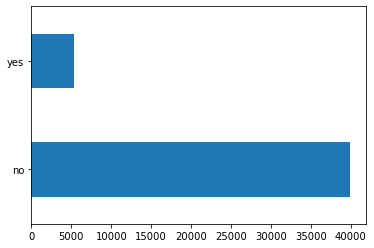

In [112]:
# Посмотрим долю целевого события
print(f"Доля целевого события:  {data['y'].value_counts()[1] / data.shape[0]:.1%}")
print(data['y'].value_counts().plot(kind='barh'))
print(data['y'].value_counts())

In [114]:
# также, чтобы лучше понять данные, можно посмотреть, например, 
# сколько денег в среднем было на счету у клиентов которые согласилсь открыть депозит в сравнении с теми кто отказался 
print(data.groupby('y')['balance'].agg('mean'))
print('соглашаются открыть депозит клиенты у которых больше денег на счете в среднем по году')
print('в дальнейшем использую это для определения стат значимости разницы этих средних')

y
no     1303.714969
yes    1804.267915
Name: balance, dtype: float64
соглашаются открыть депозит клиенты у которых больше денег на счете в среднем по году
в дальнейшем использую это для определения стат значимости разницы этих средних


In [115]:
# можно посмотреть сколько денег в среднем на счету в зависимости от уровня образования
data.groupby('education')['balance'].agg('mean')

education
primary      1250.949934
secondary    1154.880786
tertiary     1758.416435
unknown      1526.754443
Name: balance, dtype: float64

In [116]:
# Посмотрим распределение значений в категориальных полях
distribution_columns = [c for c in data.columns if data[c].dtype.name=='object']

for c in distribution_columns:
    print(data[c].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

Отметим высокую долю предыдущих коммуникаций в мае. Видимо, переменные 'month' и 'day' стоит удалить, т.к. их использование при применении модели для боевого скоринга кажется нелогичным.

In [117]:
del data['month']
del data['day']

<AxesSubplot:ylabel='Frequency'>

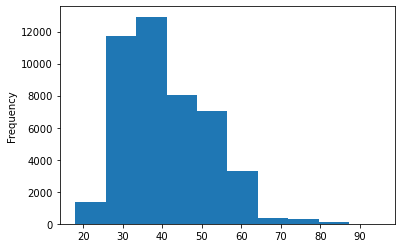

In [118]:
# распределение возраста
data['age'].plot(kind='hist')

                     sum         mean
age_bin                              
(17.999, 32.0]  12238069  1101.437224
(32.0, 36.0]     8989902  1182.570639
(36.0, 42.0]    11082436  1298.165163
(42.0, 51.0]    13608447  1411.371811
(51.0, 95.0]    15670828  1883.739392
AxesSubplot(0.125,0.125;0.775x0.755)


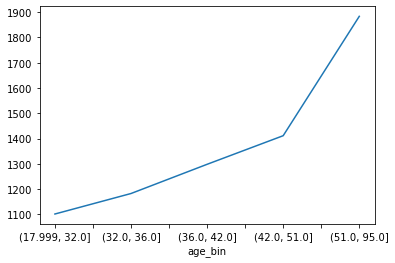

In [119]:
# количество денег у клиетов на счетах в зависимости от возрастной группы
data['age_bin'] = pd.qcut(data['age'],5)
print(data.groupby('age_bin')['balance'].agg(['sum','mean']))
print(data.groupby('age_bin')['balance'].mean().plot())

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(11, 6))
counts_plot("default", ax=ax1, col="#2e5090")
counts_plot("loan", ax=ax2, col="#5873a6")
counts_plot("contact", ax=ax3, col="#8296bc")
counts_plot("poutcome", ax=ax4, col="#abb9d3")
fig.tight_layout()
plt.show()

## 2 Проверка гипотез.  

* Тесты на равенство средних
* Тесты на равенство пропорций

### Гипотеза 1: Среднее значение среднегодового баланса на счету, у клиентов которые открыли депозит, больше, чем среднее значение баланса на счету у клиентов которые не открыли депозит.

Этапы проверки гипотезы

* 1 - формулировка нулевой и альтернативной гипотез
* 2 - выбор уровня значимости
* 3 - расчет p-value
* 4 - отклонение либо не отклонение нулевой гипотезы

Прежде чем приступить к анализу, необходимо разделить данные для сравнения.

In [123]:
deposit_yes = data[data['y']=='yes'] # таблица которая содержит клиентов оформивших депозит (5289)
deposit_no = data[data['y']=='no'] # таблица которая содержит клиентов не оформивших депозит (39922 строк)

# для првоедения теста, рандомно создадим выборки одинакового размера (по 100 клиентов в каждой)
deposit_yes_sample = deposit_yes.sample(n=100, random_state = 65895, replace = True)
deposit_no_sample = deposit_no.sample(n=100, random_state = 9648, replace = True)
# n = размер выборки
# random_state = любое число, для того чтобы была возможность в последующем получать именно эту рандомную выборку
# replace (true) = выборка с повторениями 

In [124]:
print(deposit_yes_sample['balance'].mean())
print(deposit_no_sample['balance'].mean())

1894.7
1492.85


Формулировка нулевой и альтернативной гипотез:

*   $H_0$: Нет разницы в среднем значении среднегодового баланса на счету между гуппами клиентов, которые оформили либо не оформили деопзит. (разница которую мы наблюдаем - случайность)
*   $H_A$: Статистически значимая разница есть.

In [125]:
# Уровень значимости установлен на 5%
significance_level = 0.05
significance_level

0.05

**Так как сравниваются два независимых средних значения, используем ttest**

In [126]:
# Расчет p-value.
stats.ttest_ind(a=deposit_yes_sample['balance'], b=deposit_no_sample['balance'], equal_var=False)

Ttest_indResult(statistic=0.7830900048238366, pvalue=0.4346709412236527)

#### P-value для гипотезы 1, и сравнение с уовнем значимости
p-value - вероятность получения разницы между средними, при том что нулевая гипотеза верна.
* В данном примере p-value равно 0.43, что больше чем уровень значимости 0.05.
* Нулевая гипотеза не отклонена.

### Гипотеза 2: Клиенты которые состоят в браке немного чаще склонны оформлять депозиты по сравнению с клиентами которые не состоят в браке

Этапы проверки гипотезы

* 1 - формулировка нулевой и альтернативной гипотез
* 2 - выбор уровня значимости
* 3 - расчет p-value
* 4 - отклонение либо не отклонение нулевой гипотезы

Прежде чем приступить к анализу, будет полезно разделить данные для сравнения.

In [131]:
married = data[data['marital']=='married'] # таблица которая содержит клиентов в браке
not_married = data[data['marital']!='married'] # таблица которая содержит клиентов не в браке

# для првоедения теста, рандомно создадим выборки одинакового размера (по 500 клиентов в каждой)
married_sample = married.sample(n=500, random_state = 854, replace = True)
not_married_sample = not_married.sample(n=500, random_state = 964, replace = True)

In [132]:
# посмотрим на кол-во открытых и не открытых депозитов
print(married_sample['y'].value_counts())
print('доля открытых депозитов у клиентов в браке', married_sample[married_sample['y']=='yes'].shape[0]/married_sample.shape[0])

print(not_married_sample['y'].value_counts())
print('доля открытых депозитов у клиентов не в браке', not_married_sample[not_married_sample['y']=='yes'].shape[0]/not_married_sample.shape[0])

no     458
yes     42
Name: y, dtype: int64
доля открытых депозитов у клиентов в браке 0.084
no     423
yes     77
Name: y, dtype: int64
доля открытых депозитов у клиентов не в браке 0.154


* **По данным из выборок, разница в долях открытия депозитов составляет 7% в пользу клиентов не в браке. Является ли это статистически значимой разницей в пропорциях?**
* **Для сравнения пропорций ttest не используется. Используем z-test**

Формулировка нулевой и альтернативной гипотез:

*   $H_0$: Нет разницы в доле открытых депозитов между двумя группами (в браке/не в браке)
*   $H_A$: Статистически значимая разница есть

In [129]:
# Уровень значимости установлен на 5%
significance_level = 0.05
significance_level

0.05

In [134]:
import statsmodels.stats.proportion as sp
from statsmodels.stats.proportion import proportions_ztest
# Computer your p-value here
numenator = np.array([married_sample[married_sample['y']=='yes'].shape[0], not_married_sample[not_married_sample['y']=='yes'].shape[0]])
denominator = np.array([married_sample.shape[0], not_married_sample.shape[0]])

zstat, pvalue = proportions_ztest(numenator, denominator)
print(zstat)
print(pvalue)

-3.418271935833739
0.0006302010796475853


In [135]:
sp.proportions_chisquare([married_sample[married_sample['y']=='yes'].shape[0], not_married_sample[not_married_sample['y']=='yes'].shape[0]],[married_sample.shape[0], not_married_sample.shape[0]])

(11.684583027308541,
 0.0006302010796475836,
 (array([[ 42., 458.],
         [ 77., 423.]]),
  array([[ 59.5, 440.5],
         [ 59.5, 440.5]])))

#### P-value для гипотезы 2, и сравнение с уровнем значимости

* В данном примере p-value равно 0.0006, что меньше чем уровень значимости 0.05.
* Нулевая гипотеза отклонена.
* Тот факт, что у клиентов не в браке, доля открытых депозитов выше, подтверждается статистически значимой разницей.

## 3 Логистическая регрессия, случайный лес
* Провести перекодирование целевой переменной (1 - оформил, 0 - не оформил).
* Разделить данные на train/test подвыборки, для оценки качества моделей планируется использоваться кросс-валидацию.
* Обучить разные алгоритмы (LR, RF).
* Сравнить результаты моделей ROC-AUC.

### Требования которые должны быть соблюдены для использования логистической регрессии:

* независимые переменные должны быть независимы друг от друга. То есть модель должна иметь небольшую мультиколлинеарность или вообще не иметь ее.
* отсутсвие экстремальных выбросов
* независимые переменные должны быть линейно связаны с логарифмическими шансами (logit).


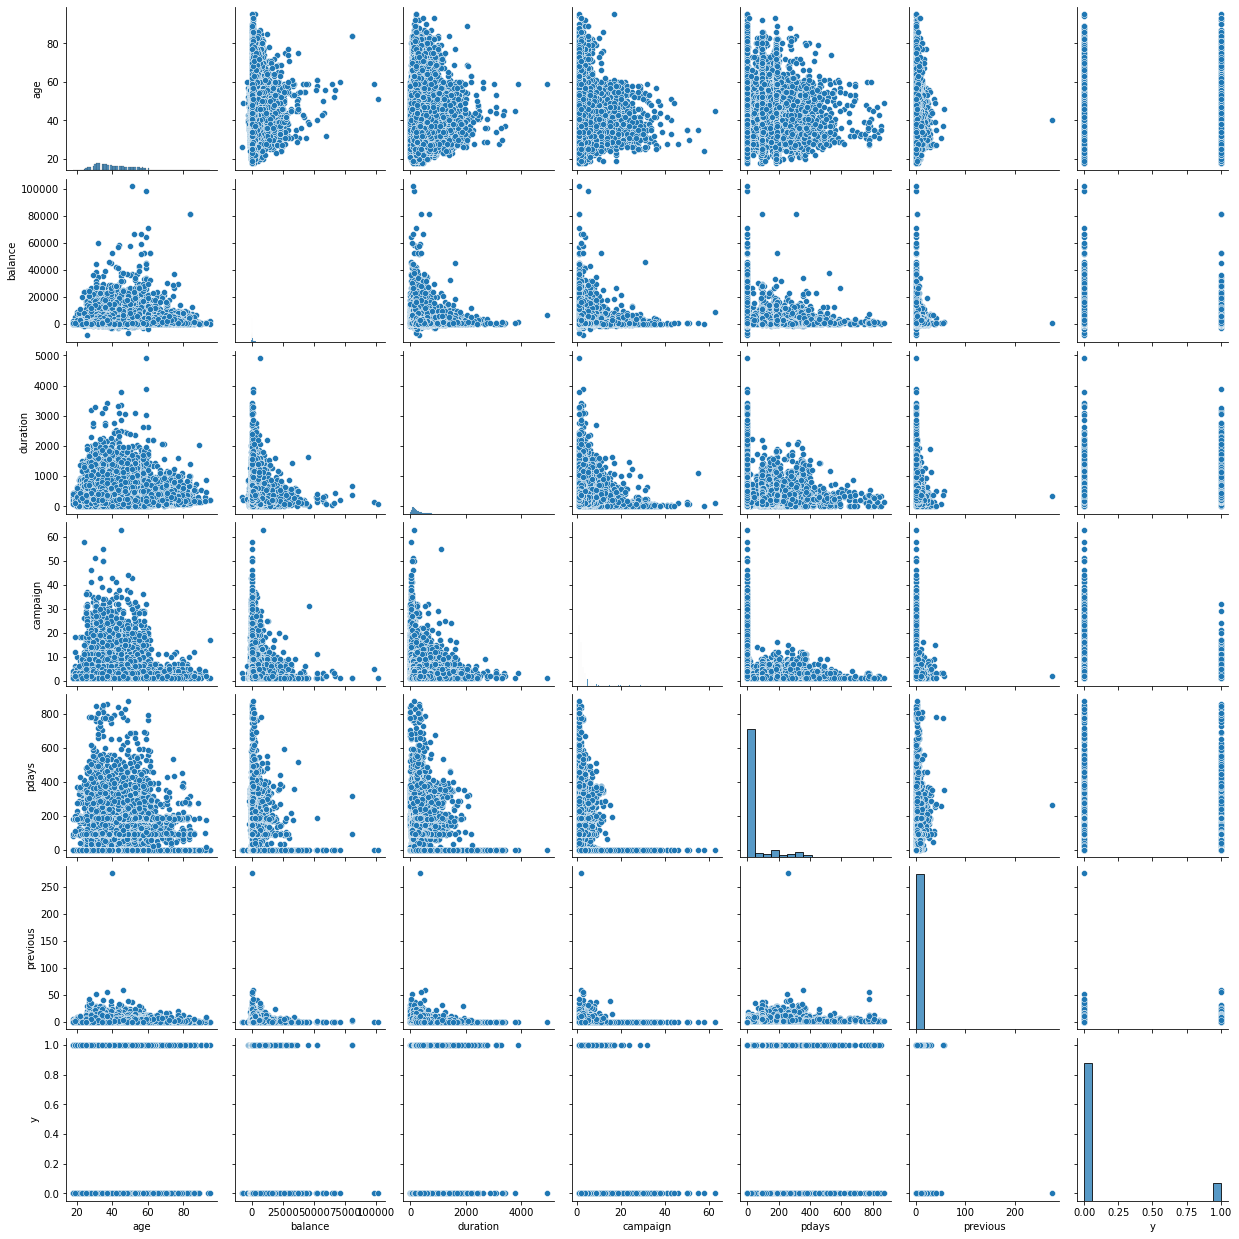

In [175]:
sns.pairplot(data)

interval columns not set, guessing: ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']


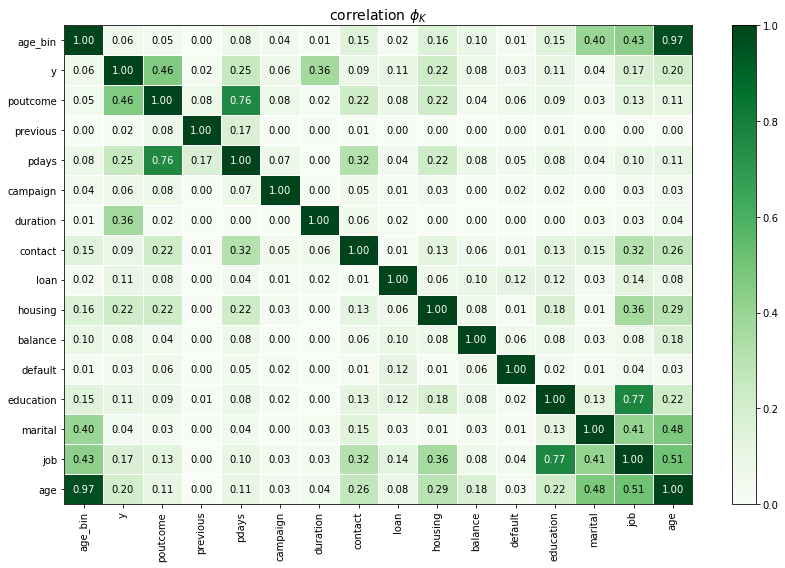

In [122]:
# Посмотрим все корреляции (интервальные + категориальные) PHIK

import phik
from phik.report import plot_correlation_matrix
from phik import report


phik_overview = data.phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(12, 8))
plt.tight_layout()

Эти переменные имеют максимальные корреляцию с целевым событияе :poutcome, pdays, duration, housing, job, age

In [136]:
# Перекодируем целевую переменную в 1/0

data['y'].replace('no', 0, inplace=True)
data['y'].replace('yes', 1, inplace=True)

# Проверим, как прошла замена
data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [141]:
# Разделим данные на train,  test в пропорции 80%-20% соответственно.
RANDOM_STATE = 190922
X = data.drop(['y'], axis=1)
y = data['y'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

# Замена категориальных данных на числовые
X_train_dum = pd.get_dummies(X_train, drop_first=True)
X_test_dum = pd.get_dummies(X_test, drop_first=True)

# Выбор колонок для масштабирования данных
col_names = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Обучим и применим scaler на train
X_train_scaled = X_train_dum.copy()
features_train = X_train_scaled[col_names]
scaler = StandardScaler().fit(features_train.values)
features = scaler.transform(features_train.values)
X_train_scaled[col_names] = features

# Применим обученный scaler на test
X_test_scaled = X_test_dum.copy()
features_test = X_test_scaled[col_names]
features = scaler.transform(features_test.values)
X_test_scaled[col_names] = features

# проверим размерности выборок
print(f'X: {X.shape}')
print(f'y : {y.shape}')
print(f'X_train : {X_train.shape}')
print(f'X_train_dum : {X_train_dum.shape}')
print(f'X_train_scaled : {X_train_scaled.shape}')
print(f'y_train : {y_train.shape}')

print(f'X_test : {X_test.shape}')
print(f'X_test_dum : {X_test_dum.shape}')
print(f'X_test_scaled : {X_test_scaled.shape}')
print(f'y_test : {y_test.shape}')

# Проверим стратификацию
print(f"Доля целевого события по всей выборке:  {y.sum() / y.shape[0]:.1%}")
print(f"Доля целевого события по train:  {y_train.sum() / y_train.shape[0]:.1%}")
print(f"Доля целевого события по test:  {y_test.sum() / y_test.shape[0]:.1%}")

X: (45211, 15)
y : (45211,)
X_train : (36168, 15)
X_train_dum : (36168, 34)
X_train_scaled : (36168, 34)
y_train : (36168,)
X_test : (9043, 15)
X_test_dum : (9043, 34)
X_test_scaled : (9043, 34)
y_test : (9043,)
Доля целевого события по всей выборке:  11.7%
Доля целевого события по train:  11.7%
Доля целевого события по test:  11.7%


Обратим внимание, что после дамми-кодирования и в train, и в test одинаковое кол-во полей

### Модель Логистическая регрессия

In [181]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# При помощи перебора по сетке определим оптимальный коэффициент регулярицазии
lr_params_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]
                 }

LR_DEF = GridSearchCV(LogisticRegression(random_state=RANDOM_STATE
                                         , solver='lbfgs'
                                         , penalty='l2'
                                         , max_iter=100)
                                         , param_grid=lr_params_grid
                                         , scoring = 'roc_auc'
                                         , cv = 5
                                         , verbose=0
                                        )
# Для несбалансированных наборов данных accuracy не является подходящей метрикой. используем 'roc_auc'

# строим логистическую регрессию
LR_DEF.fit(X_train_scaled, y_train.values.astype(int))

LR_DEF_pred_train = LR_DEF.predict(X_train_scaled)

lr_best_params = LR_DEF.best_params_
lr_best_auc = round(LR_DEF.best_score_, 3)
print(lr_best_params)
print(f'AUC на cv: {lr_best_auc}')
print(f'ACCURACY: {round(accuracy_score(y_train.values.astype(int), (LR_DEF_pred_train).astype(int)),3)}')
print(confusion_matrix(y_train.values.astype(int), LR_DEF_pred_train))
print(classification_report(y_train.values.astype(int), LR_DEF_pred_train))

{'C': 0.1}
AUC на cv: 0.892
ACCURACY: 0.901
[[31222   715]
 [ 2876  1355]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     31937
           1       0.65      0.32      0.43      4231

    accuracy                           0.90     36168
   macro avg       0.79      0.65      0.69     36168
weighted avg       0.89      0.90      0.89     36168



### Модель случайный лес

In [154]:
# обозначаем модель
rf = RandomForestClassifier()

# обозначаем функцию cross_val_score. в нее в качетсве параметров подадим rf, признаки, сv(на сколько частей поделены данные для итераций)
scores = cross_val_score(rf, X_train_dum, y_train.values.ravel(), cv = 5)
scores

array([0.89618468, 0.89936411, 0.89964059, 0.90073275, 0.90377437])

In [170]:
# прогоним модель с различными гиперпараметрами для нахождения оптимальных параметров
params = {'n_estimators':[5, 25, 50, 100],
          'max_depth':[2, 12, 24, None]}
# 'n_estimators' - количество деревьев, 'max_depth' - глубина деревьев
                 

cross_val = GridSearchCV(rf, params, cv = 5, scoring='roc_auc')
cross_val.fit(X_train_dum, y_train.values.ravel())

# функция для просмотра результатов cross_val
RF_DEF_pred_train = cross_val.predict(X_train_dum)

rf_best_params = cross_val.best_params_
rf_best_auc = round(cross_val.best_score_, 3)
print(rf_best_params)
print(f'AUC на cv: {lr_best_auc}')





{'max_depth': 12, 'n_estimators': 100}
0.903


In [171]:
# Сравним результаты моделей:
lr_best_auc, rf_best_auc

res_auc = np.array([
                [lr_best_auc, rf_best_auc]
                ])
col_names = ['LR', 'RF']
auc_results_valid = pd.DataFrame(data=res_auc, columns=col_names)

display(auc_results_valid)

,LR,RF
0,0.892,0.903


Модель с лучшим ROC-AUC - случайный лес

In [174]:
# Проверим качество модели линейной регрессии на отложенной выборке
predicted_test_lr = LR_DEF.predict_proba(X_test_dum)[:,1]

  
print("ROC_AUC:", round(roc_auc_score(y_test, predicted_test_lr), 2))
print(f'ACCURACY: {round(accuracy_score(y_test.values.astype(int), (predicted_test_lr).astype(int)),3)}')

ROC_AUC: 0.51
ACCURACY: 0.142


In [173]:
# Проверим качество модели случайного леса на отложенной выборке
predicted_test_rf = cross_val.predict_proba(X_test_dum)[:,1]

  
print("ROC_AUC:", round(roc_auc_score(y_test, predicted_test_rf), 2))
print(f'ACCURACY: {round(accuracy_score(y_test.values.astype(int), (predicted_test_rf).astype(int)),3)}')

ROC_AUC: 0.9
ACCURACY: 0.883


### Вывод

Лучшей моделью при проверки качества на отложенной выборке оказаласть модель Случайный лес.
ROC_AUC: 0.9